## Boligstat data analyse

Denne notebook renser og præsenterer en række data fra boligstat.dk, hvor Social- og Boligstyrelsen fremlægger en række data på både alment og privat huslejeniveau, alment byggeri samt regnskaberne for de almene boligforeninger, over hele landet.

In [1]:
# Importer biblioteker

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlsxwriter as xl 


In [2]:
"""
Danner to niveauer af kolonner for at matche kildedataen, vil senere konverteres til langt format.
"""

arrays = [
    ['-1949','-1949','-1949','1950-1973','1950-1973','1950-1973','1974-1999','1974-1999','1974-1999','2000+','2000+','2000+'],
    ['Almene_familieboliger','Private_udlejningsboliger_andre','Private_udlejningsboliger_ejer',
     'Almene_familieboliger','Private_udlejningsboliger_andre','Private_udlejningsboliger_ejer',
     'Almene_familieboliger','Private_udlejningsboliger_andre','Private_udlejningsboliger_ejer',
     'Almene_familieboliger','Private_udlejningsboliger_andre','Private_udlejningsboliger_ejer'],
]

tuples = list(zip(*arrays))

df_columns = pd.MultiIndex.from_tuples(tuples,names=["Ibrugtaget", "Type"])
df_columns

MultiIndex([(    '-1949',           'Almene_familieboliger'),
            (    '-1949', 'Private_udlejningsboliger_andre'),
            (    '-1949',  'Private_udlejningsboliger_ejer'),
            ('1950-1973',           'Almene_familieboliger'),
            ('1950-1973', 'Private_udlejningsboliger_andre'),
            ('1950-1973',  'Private_udlejningsboliger_ejer'),
            ('1974-1999',           'Almene_familieboliger'),
            ('1974-1999', 'Private_udlejningsboliger_andre'),
            ('1974-1999',  'Private_udlejningsboliger_ejer'),
            (    '2000+',           'Almene_familieboliger'),
            (    '2000+', 'Private_udlejningsboliger_andre'),
            (    '2000+',  'Private_udlejningsboliger_ejer')],
           names=['Ibrugtaget', 'Type'])

In [3]:
"""
Importerer boligstat csv filer med data på huslejeniveauer fordelt på ibrugtagningsår og ejerforhold
"""

# Initialize an empty list to store DataFrames
dfs = []

# Loop to load DataFrames and store them in the list
for i in range(0, 7):
    if i == 0:
        filename = 'temp.csv'
    else:
        filename = f'temp({i}).csv'
    
    # Read the CSV file
    df = pd.read_csv(filename, encoding='ISO-8859-1', sep=';', skiprows=1)

    df = df.drop(columns=['Område'])

     
    # Drop the first two rows
    df  = df[1:-4]

    # Set the column names
    df.columns = df_columns

    # Add year column:
    df['Year'] = 2022-i
    
        # Append the DataFrame to the list
    dfs.append(df)

# Concatenate the DataFrames
rent_df = pd.concat(dfs)

# Reset index
rent_df.reset_index(drop=True, inplace=True)
rent_df


Ibrugtaget                 -1949                                  \
Type       Almene_familieboliger Private_udlejningsboliger_andre   
0                            867                           1.005   
1                            846                             941   
2                            846                             909   
3                            844                             867   
4                            833                             849   
5                            814                             804   
6                            800                             790   

Ibrugtaget                                            1950-1973  \
Type       Private_udlejningsboliger_ejer Almene_familieboliger   
0                                   1.206                   902   
1                                   1.155                   880   
2                                   1.110                   880   
3                                   1.064                   876   
4                                   1.021                   867   
5                                     963                   850   
6                                     930                   833   

Ibrugtaget                                                                 \
Type       Private_udlejningsboliger_andre Private_udlejningsboliger_ejer   
0                                      996                          1.221   
1                                      952                          1.125   
2                                      929                          1.089   
3                                      890                          1.053   
4                                      858                          1.005   
5                                      812                            956   
6                                      795                            938   

Ibrugtaget             1974-1999                                  \
Type       Almene_familieboliger Private_udlejningsboliger_andre   
0                          1.022                           1.278   
1                            996                           1.149   
2                            996                           1.106   
3                            991                           1.157   
4                            986                           1.152   
5                            971                           1.107   
6                            961                           1.055   

Ibrugtaget                                                2000+  \
Type       Private_udlejningsboliger_ejer Almene_familieboliger   
0                                   1.261                 1.135   
1                                   1.246                 1.122   
2                                   1.193                 1.117   
3                                   1.136                 1.103   
4                                   1.124                 1.101   
5                                   1.105                 1.095   
6                                   1.060                 1.082   

Ibrugtaget                                                                 \
Type       Private_udlejningsboliger_andre Private_udlejningsboliger_ejer   
0                                    1.653                          1.631   
1                                    1.593                          1.622   
2                                    1.556                          1.564   
3                                    1.499                          1.514   
4                                    1.481                          1.450   
5                                    1.303                          1.331   
6                                    1.397                          1.291   

Ibrugtaget  Year  
Type              
0           2022  
1           2021  
2           2020  
3           2019  
4           2018  
5           2017  
6           2016

In [4]:
"""
Konverterer data'en til langt format for lettere analyse
"""

# Melt the DataFrame
melted_df = pd.melt(rent_df, id_vars=['Year'], var_name=['Ibrugtaget', 'Type'], value_name='Value')
# Pivot 'Ibrugtaget' back to wide format
wide_df_ibrugtaget = melted_df.pivot_table(index=['Year', 'Type'], columns='Ibrugtaget', values='Value', aggfunc='first').reset_index()
wide_df_type = melted_df.pivot_table(index=['Year', 'Ibrugtaget'], columns='Type', values='Value', aggfunc='first').reset_index()
wide_df_ibrugtaget

Ibrugtaget,Year,Type,-1949,1950-1973,1974-1999,2000+
0,2016,Almene_familieboliger,800,833,961,1.082
1,2016,Private_udlejningsboliger_andre,790,795,1.055,1.397
2,2016,Private_udlejningsboliger_ejer,930,938,1.060,1.291
3,2017,Almene_familieboliger,814,850,971,1.095
4,2017,Private_udlejningsboliger_andre,804,812,1.107,1.303
5,2017,Private_udlejningsboliger_ejer,963,956,1.105,1.331
6,2018,Almene_familieboliger,833,867,986,1.101
7,2018,Private_udlejningsboliger_andre,849,858,1.152,1.481
8,2018,Private_udlejningsboliger_ejer,1.021,1.005,1.124,1.450
9,2019,Almene_familieboliger,844,876,991,1.103


C:\Users\Otto\AppData\Local\Temp\ipykernel_6032\180223524.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']] = subset_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']].replace('\.', '', regex=True).astype(int)
C:\Users\Otto\AppData\Local\Temp\ipykernel_6032\180223524.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']] = subset_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']].replace('

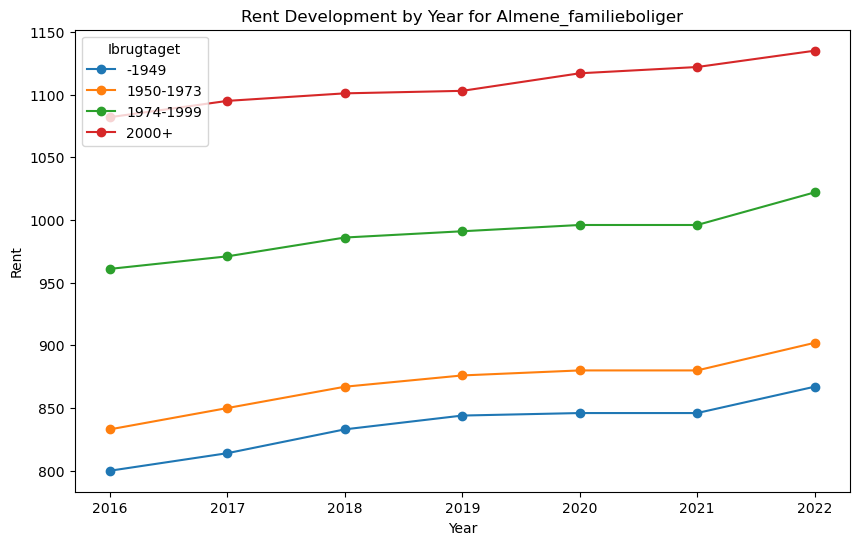

C:\Users\Otto\AppData\Local\Temp\ipykernel_6032\180223524.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']] = subset_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']].replace('\.', '', regex=True).astype(int)
C:\Users\Otto\AppData\Local\Temp\ipykernel_6032\180223524.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']] = subset_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']].replace('

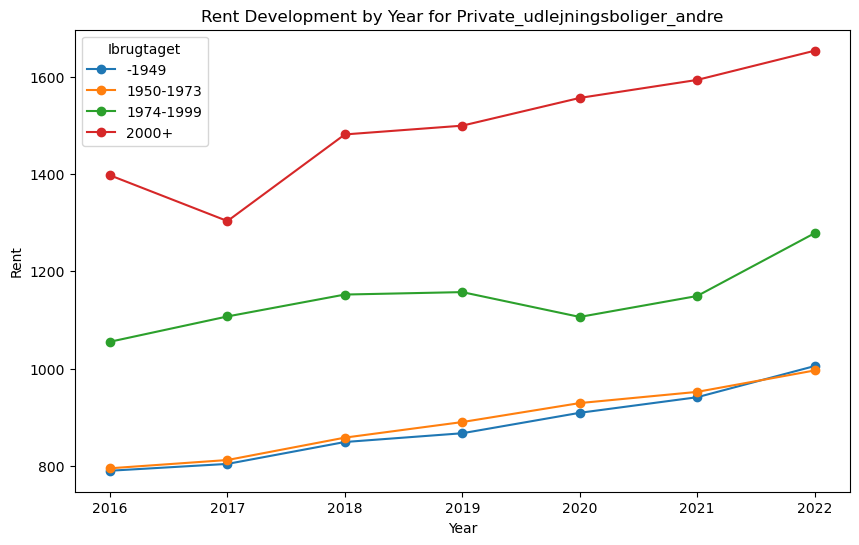

C:\Users\Otto\AppData\Local\Temp\ipykernel_6032\180223524.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']] = subset_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']].replace('\.', '', regex=True).astype(int)
C:\Users\Otto\AppData\Local\Temp\ipykernel_6032\180223524.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']] = subset_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']].replace('

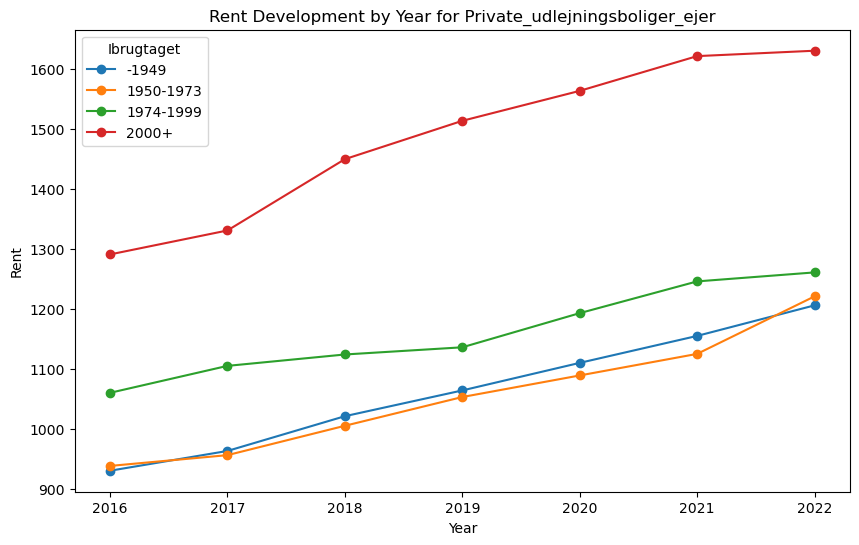

In [5]:
"""
Plotter huslejeudviklingen i 3 grafer, en for hver ejerforhold.
"""

# Iterate over each 'Type'
for t in wide_df_ibrugtaget['Type'].unique():
    # Filter the DataFrame for the specific 'Type'
    subset_df = wide_df_ibrugtaget[wide_df_ibrugtaget['Type'] == t]
    
    # Convert the values to integers
    subset_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']] = subset_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']].replace('\.', '', regex=True).astype(int)
    
    # Sort the subset DataFrame by the 'Year' column
    subset_df = subset_df.sort_values(by='Year')
    
    # Create a figure and axis objects
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the rent over the years for each 'Ibrugtaget'
    for col in ['-1949', '1950-1973', '1974-1999', '2000+']:
        ax.plot(subset_df['Year'], subset_df[col], marker='o', label=col)
    
    # Set labels and title
    ax.set_title(f'Rent Development by Year for {t}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rent')
    
    # Show legend
    ax.legend(title='Ibrugtaget', loc='upper left')
    
    # Show plot
    plt.show()

In [6]:
""" 
Slicer data'en for at klargøre vækstberegninger
"""

cols = ['-1949', '1950-1973', '1974-1999', '2000+']
types = ['Almene_familieboliger','Private_udlejningsboliger_andre','Private_udlejningsboliger_ejer']

# Filter the DataFrame for the years 2016 and 2022
vækst_df = wide_df_ibrugtaget[(wide_df_ibrugtaget['Year'] == 2016) | (wide_df_ibrugtaget['Year'] == 2022)]
# Convert the values to integers
vækst_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']] = vækst_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']].replace('\.', '', regex=True).astype(int)

C:\Users\Otto\AppData\Local\Temp\ipykernel_6032\3939979091.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vækst_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']] = vækst_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']].replace('\.', '', regex=True).astype(int)
C:\Users\Otto\AppData\Local\Temp\ipykernel_6032\3939979091.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vækst_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']] = vækst_df.loc[:, ['-1949', '1950-1973', '1974-1999', '2000+']].replace('\.

In [7]:
"""
Konstruerer dataframe med vækstrater for hvert Ejerforhold/ibrugtagningstidspunkt par
"""

vækstrater = []

for type in types:
    subset_df = vækst_df[(vækst_df['Type']==type)] 
    subset_df.index = subset_df['Year']
    a = subset_df[(subset_df['Year']==2022)]
    b = subset_df[(subset_df['Year']==2016)]
    a = a[cols].reset_index()
    b = b[cols].reset_index()
    v = ((a-b)/b*100).round(2).astype(str) + '%'
    v['Type']=type
    vækstrater.append(v)

vækstrate_df = pd.concat(vækstrater)
vækstrate_df.index = vækstrate_df['Type']
vækstrate_df = vækstrate_df.drop(['Type', 'Year'], axis=1)

Ovenstående kode udregner vækstrater for huslejen i hver type bolig og for hvert interval af ibrugtagningsår. Nedenfor ses resultaterne, der tydeliggør forskellen i det private og almene byggeri

In [8]:
vækstrate_df

Ibrugtaget,-1949,1950-1973,1974-1999,2000+
Type,,,,
Almene_familieboliger,8.38%,8.28%,6.35%,4.9%
Private_udlejningsboliger_andre,27.22%,25.28%,21.14%,18.32%
Private_udlejningsboliger_ejer,29.68%,30.17%,18.96%,26.34%


Nedenstående kode importerer og renser data fra de almene boligforeningers regnskaber i 2022, fordelt på ibrugtagningsår. Den nederste del af csv filen indeholder information on datagrundlaget, og denne tilføjes til en seperat dataframe

In [9]:
"""
Læser data for de almene boligforeningers regnskaber (regnskabsår 2022, kun Hovedstaden. Flere geografier tilgængelig i kildedata). Opdelt på ibrugtagningsår.
"""

df2 = pd.read_csv('temp(7).csv', encoding='ISO-8859-1', sep=';')
columns2=df2.iloc[0].shift(1)
columns2[1]='drop'
columns2[11]='Alle'
df2.columns = columns2
df2 = df2.drop(['drop'], axis=1)
df21 = df2.iloc[57:].reset_index(drop=True)
df2 = df2.iloc[1:57].reset_index(drop=True)

df2.head(60)

,None,Før 1940,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-,Alle
0,105.9 Nettokapitaludgifter (beboerbetaling),13,18,39,72,175,320,481,675,718,171
1,113.9 Offentlige og andre faste udgifter i alt,301,352,310,275,226,259,278,238,230,277
2,106 Ejendomsskatter,68,82,67,63,58,87,82,63,70,68
3,107 Vandafgift,23,37,40,39,29,25,28,14,5,32
4,"108 Kloakbidrag, vejafgift m.v.",0,0,0,0,0,0,0,0,0,0
5,109 Renovation,36,39,36,34,32,36,37,33,30,35
6,110 Forsikringer,19,18,18,16,17,18,18,16,15,17
7,111 Afdelingens energiforbrug,21,23,25,28,30,29,39,43,42,29
8,112 Bidrag til boligorganisationen,68,80,64,66,60,64,73,70,68,66
9,112.1 Administrationsbidrag,61,72,61,62,55,59,66,64,61,61


In [10]:
""" 
Bilag til regnskaberne i bunden af tabellen som er blevet separeret, indeholder datagrundlaget for rengskaberne (hvor mange afdelinger, boliger, m2)
"""

df21

,None,Før 1940,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-,Alle
0,Antal afdelinger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alle,NaN
1,NaN,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-,NaN,NaN
2,NaN,95,169,119,110,127,174,86,115,1.051,NaN
3,Antal boliger,Ibrugtagelsesår,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alle
4,NaN,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-,NaN,NaN
5,NaN,9.315,16.153,33.334,33.979,27.018,11.882,10.851,4.696,7.323,154.551
6,Antal kvm,Ibrugtagelsesår,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alle
7,NaN,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-,NaN,NaN
8,NaN,676.373,1.039.761,2.509.696,2.564.022,2.284.664,913.602,748.225,344.651,561.465,11.642.459


In [43]:
gns_boligstr= 11642459/154551

gns_boligstr

75.33085518696093

Nedenstående kode importerer og renser data for antallet af (færdiggjorte) almene boliger fordelt på boligtyper i forskellige kommuner.

Note: Fil skal erstattes af en med alle kommuner + total

In [92]:
""" 
Læser csv filen med data om antal opførte almene boliger, fordelt på type
"""
df3 = pd.read_csv('temp(8).csv', encoding='ISO-8859-1', sep=';', skiprows=1)
df3

,Kommune,Familieboliger (antal),Familieboliger (antal).1,Familieboliger (antal).2,Familieboliger (antal).3,Familieboliger (antal).4,Familieboliger (antal).5,Familieboliger (antal).6,Familieboliger (antal).7,Familieboliger (antal).8,...,Alle almene boliger (antal).20,Alle almene boliger (antal).21,Alle almene boliger (antal).22,Alle almene boliger (antal).23,Alle almene boliger (antal).24,Alle almene boliger (antal).25,Alle almene boliger (antal).26,Alle almene boliger (antal).27,Alle almene boliger (antal).28,Alle almene boliger (antal).29
0,NaN,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,...,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,I alt
1,101 København,48.0,80.0,233.0,139.0,76.0,203.0,0.0,12.0,26.0,...,216.0,333.0,744.0,161.0,1073.0,706.0,536.0,283.0,151.0,10252
2,751 Aarhus,57.0,109.0,261.0,263.0,59.0,228.0,118.0,212.0,425.0,...,432.0,255.0,170.0,268.0,204.0,1362.0,749.0,1214.0,633.0,15307
3,851 Aalborg,119.0,58.0,145.0,27.0,86.0,157.0,41.0,89.0,176.0,...,288.0,602.0,430.0,327.0,432.0,727.0,469.0,81.0,167.0,11084
4,I alt,224.0,247.0,639.0,429.0,221.0,588.0,159.0,313.0,627.0,...,936.0,1190.0,1344.0,756.0,1709.0,2795.0,1754.0,1578.0,951.0,36643
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Kilde: SBST, Status primo April 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df3 = df3.iloc[:5].T
df3.columns = df3.iloc[0]
df3.rename(columns={df3.columns[0]:'Year'}, inplace=True)
df3.reset_index(inplace=True)
df3.set_index('Year', inplace=True)
df3.rename(columns={'index':'Type'}, inplace=True)
df3 = df3.iloc[1:]
# Extract the first column (Kommune) before renaming
kommune_column = df3.iloc[:, 0]

# Remove numbers from other column names
df3.columns = [col.split(" ")[-1] if col != "Kommune" else col for col in df3.columns]

# Assign the Kommune column back to the DataFrame
df3.iloc[:, 0] = kommune_column

df3['Type'] = df3['Type'].str.split(r' \(antal\)', expand=True)[0]
for col in df3.columns:
    if col != 'Type':
        df3[col] = df3[col].astype(int)
df3

,Type,København,Aarhus,Aalborg,alt
Year,,,,,
1995.0,Familieboliger,48,57,119,224
1996.0,Familieboliger,80,109,58,247
1997.0,Familieboliger,233,261,145,639
1998.0,Familieboliger,139,263,27,429
1999.0,Familieboliger,76,59,86,221
...,...,...,...,...,...
2020.0,Alle almene boliger,706,1362,727,2795
2021.0,Alle almene boliger,536,749,469,1754
2022.0,Alle almene boliger,283,1214,81,1578


In [94]:
df3[df3['Type']=='Alle almene boliger']

,Type,København,Aarhus,Aalborg,alt
Year,,,,,
1995.0,Alle almene boliger,182,221,137,540
1996.0,Alle almene boliger,400,418,97,915
1997.0,Alle almene boliger,735,602,431,1768
1998.0,Alle almene boliger,376,623,171,1170
1999.0,Alle almene boliger,84,448,411,943
2000.0,Alle almene boliger,352,431,382,1165
2001.0,Alle almene boliger,157,427,233,817
2002.0,Alle almene boliger,62,500,129,691
2003.0,Alle almene boliger,58,724,715,1497


In [104]:
df3_ialt = df3[df3.index == 'I alt']
df3_tidsserie = df3[df3.index != 'I alt']

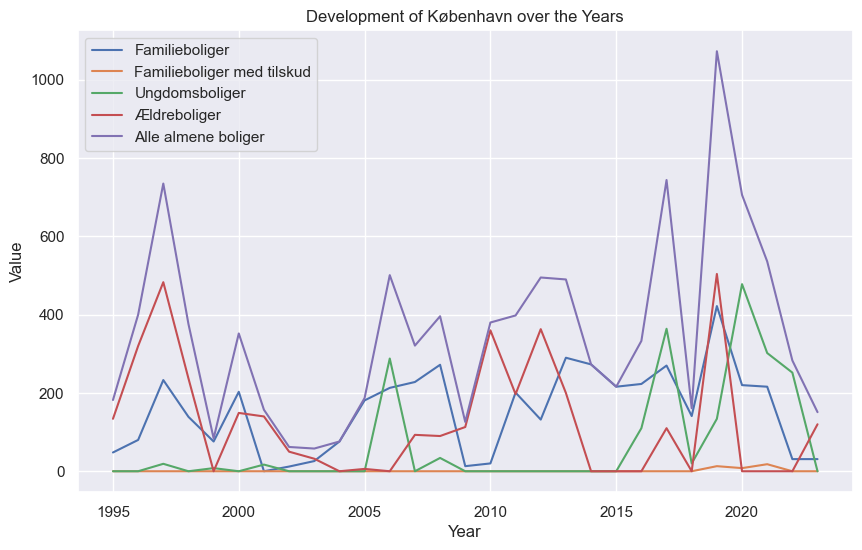

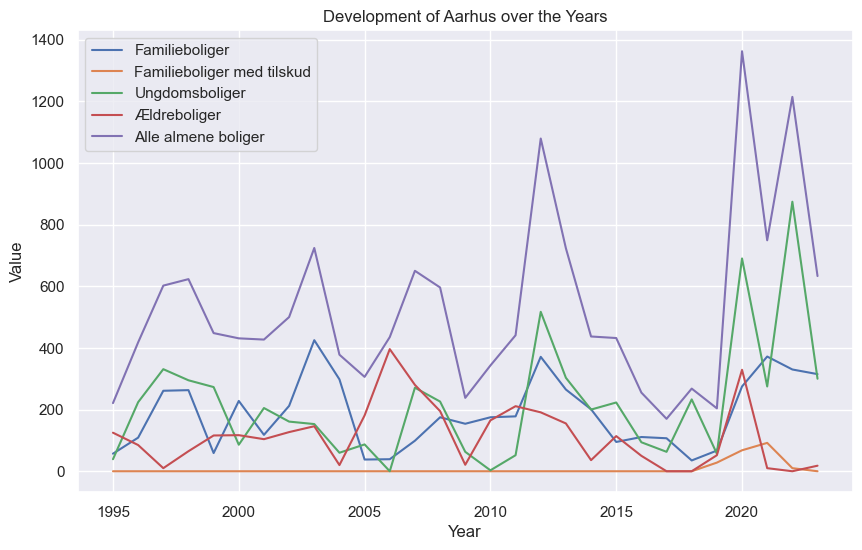

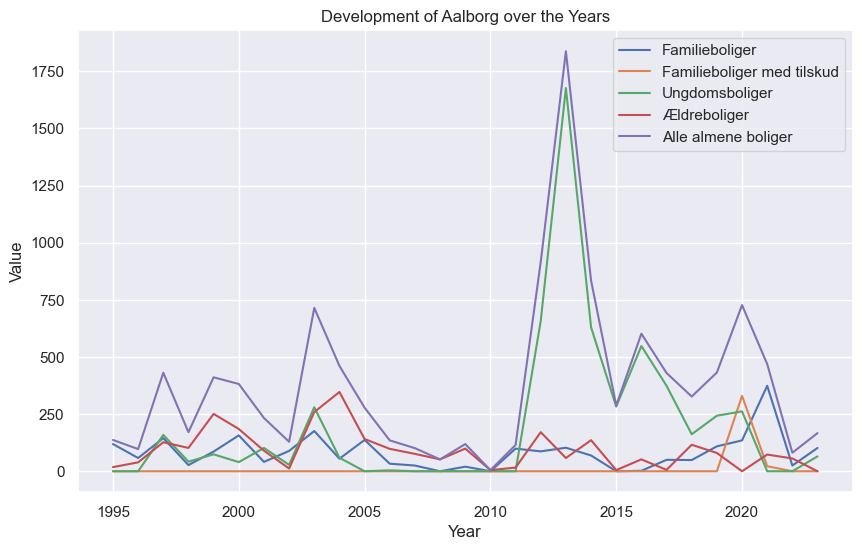

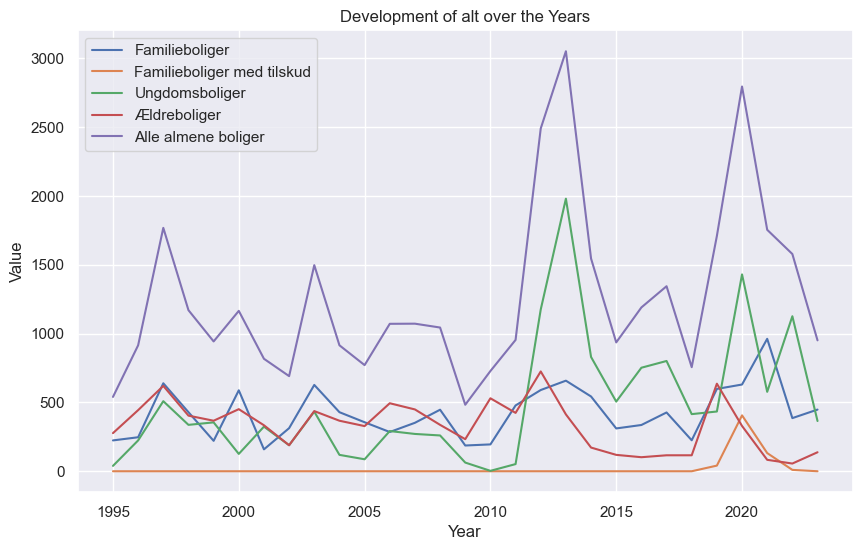

In [109]:
# Get unique city names
cities = df3_tidsserie.columns[1:]

# Iterate over each city
for city in cities:
    # Create a new figure
    plt.figure(figsize=(10, 6))
    
    # Plot development of each city over the years with hue representing the 'Type'
    sns.lineplot(data=df3_tidsserie, x=df3_tidsserie.index, y=city, hue='Type', markers=True)
    
    # Set title and labels
    plt.title(f'Development of {city} over the Years')
    plt.xlabel('Year')
    plt.ylabel('Value')
    
    # Show legend
    plt.legend()
    
    # Show plot
    plt.show()


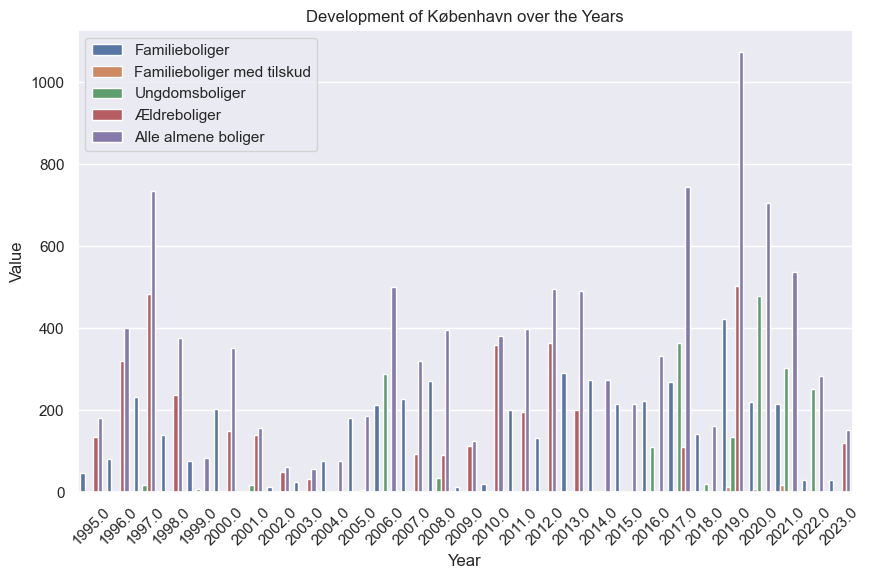

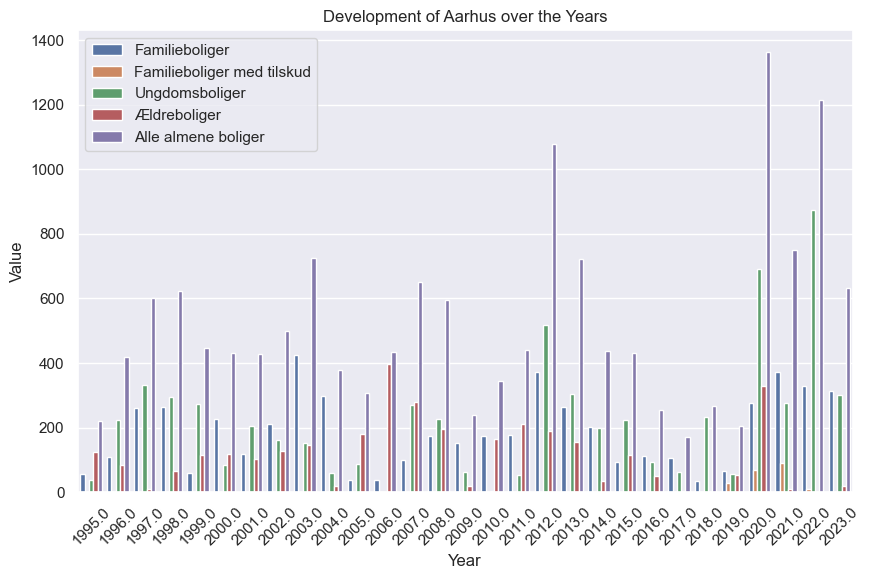

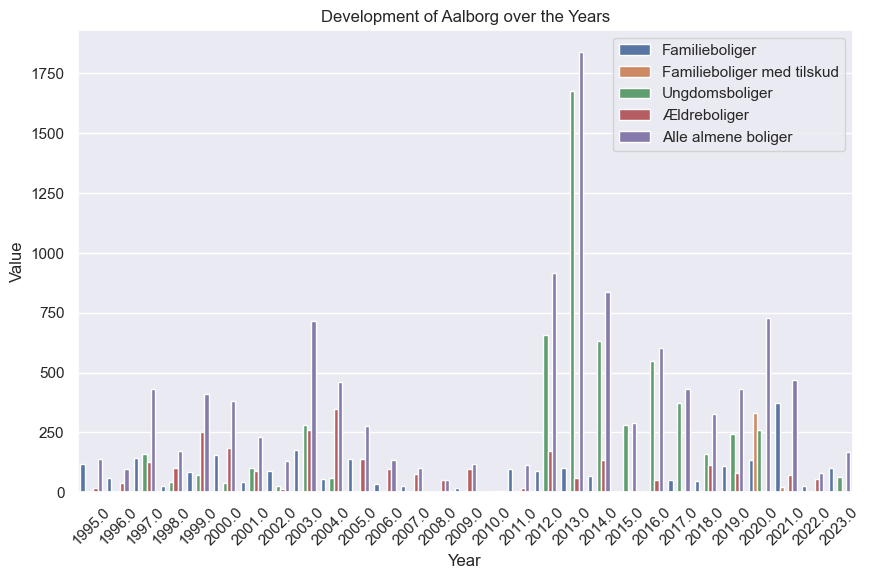

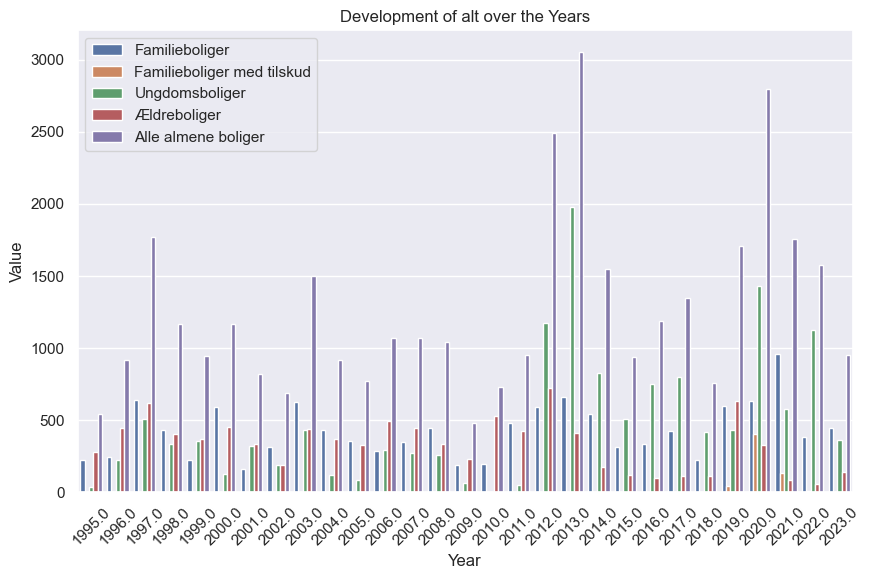

In [112]:

# Iterate over each city
for city in cities:
    # Create a new figure
    plt.figure(figsize=(10, 6))
    
    # Plot development of each city over the years with hue representing the 'Type'
    sns.barplot(data=df3_tidsserie, x=df3_tidsserie.index, y=city, hue='Type')
    
    # Set title and labels
    plt.title(f'Development of {city} over the Years')
    plt.xlabel('Year')
    plt.ylabel('Value')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    # Show legend
    plt.legend()
    
    # Show plot
    plt.show()


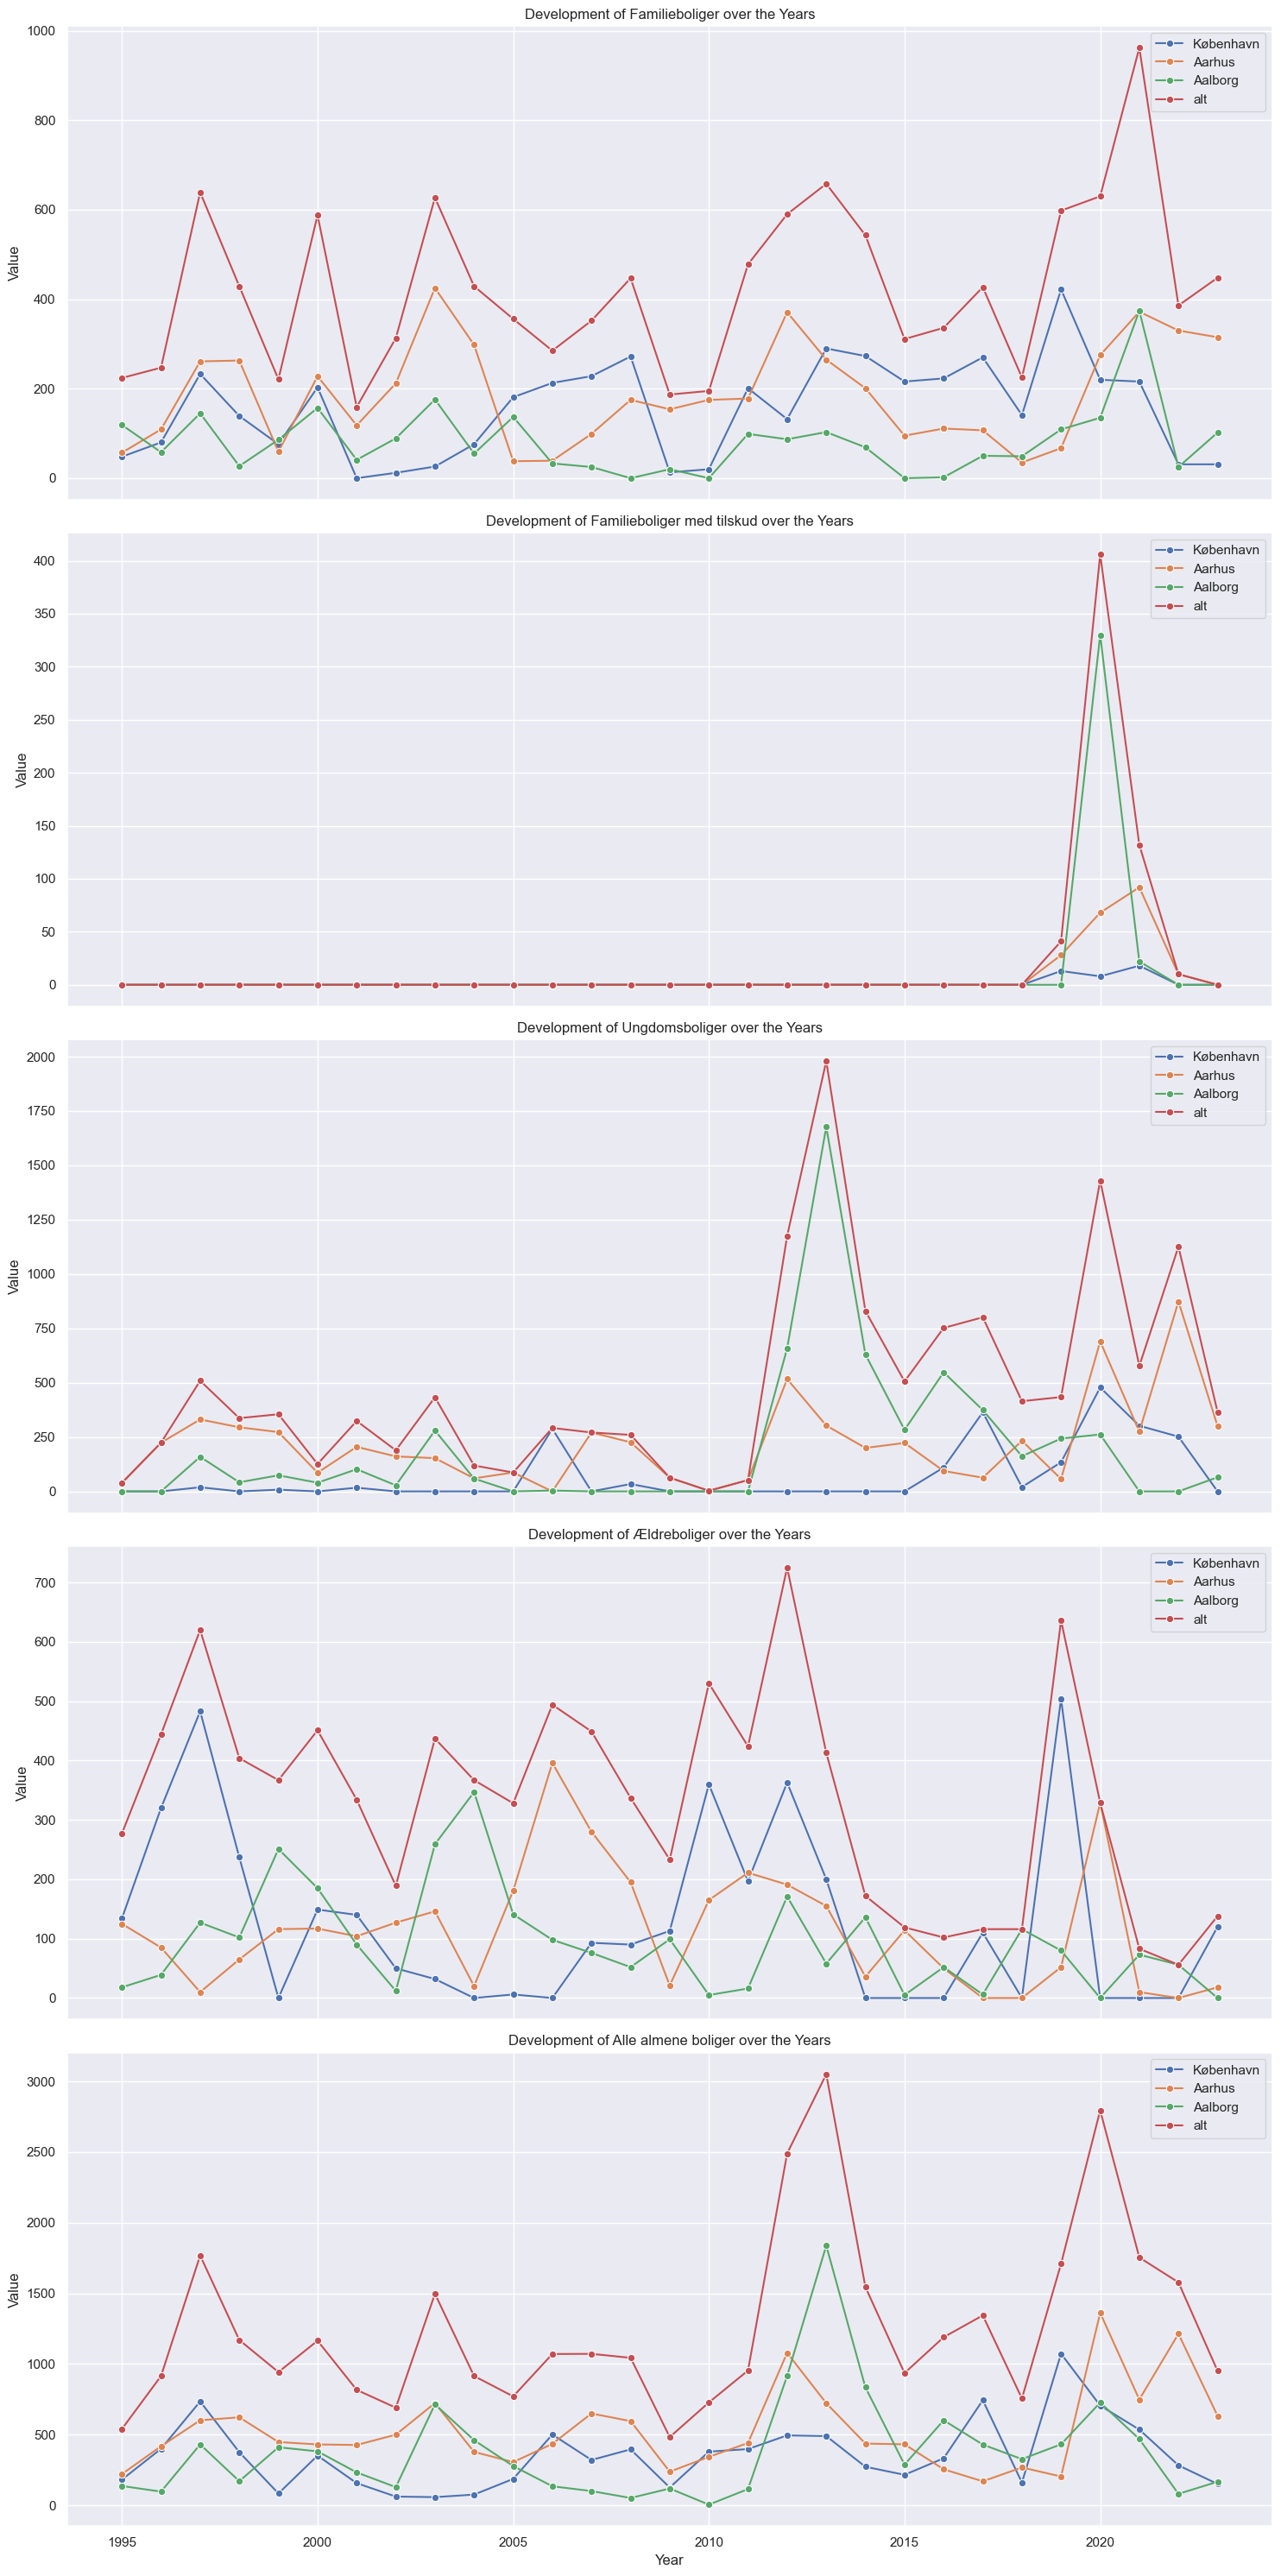

In [117]:
# Get unique city names
cities = df3_tidsserie.columns[1:]

# Get unique types
types = df3_tidsserie['Type'].unique()

# Determine the number of rows and columns for subplots
num_rows = len(types)
num_cols = len(cities)

# Create subplots for each type
fig, axes = plt.subplots(num_rows, 1, figsize=(15, 6*num_rows), sharex=True)

# Iterate over each type
for i, t in enumerate(types):
    # Create a plot for the current type
    ax = axes[i]
    # Get data for the current type
    data_type = df3_tidsserie[df3_tidsserie['Type'] == t]
    # Iterate over each city
    for city in cities:
        # Plot development of each city over the years for the current type
        sns.lineplot(data=data_type, x=data_type.index, y=city, ax=ax, label=city, marker='o')
    
    # Set title and labels
    ax.set_title(f'Development of {t} over the Years')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    # Show legend
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
